<a href="https://colab.research.google.com/github/Swapn2/Data-Science-Learnings/blob/main/Kernel_Trick_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

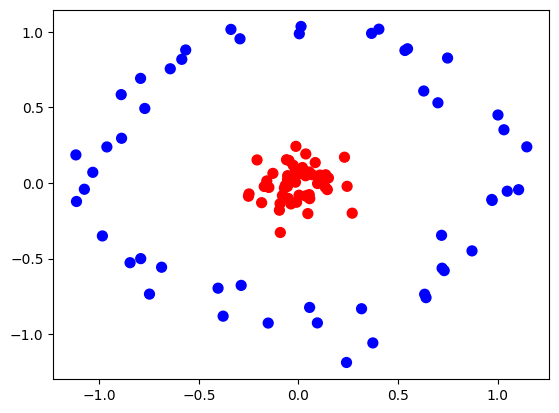

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                                 stop = X_set[:, 0].max() + 1,
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1,
                                 stop = X_set[:, 1].max() + 1,
                                 step = 0.01))

    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75,
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

<ipython-input-7-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


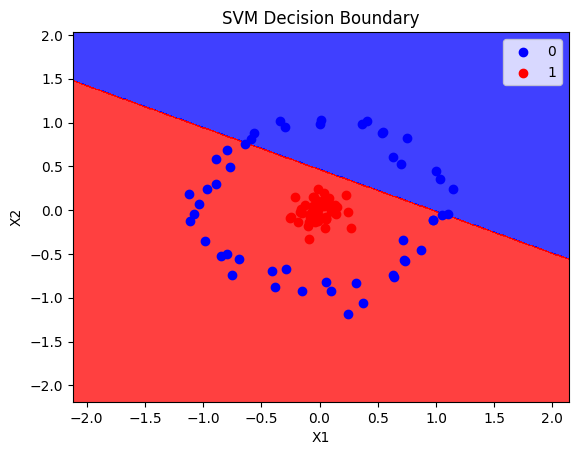

In [8]:
plot_decision_boundary(X, y, classifier)

In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

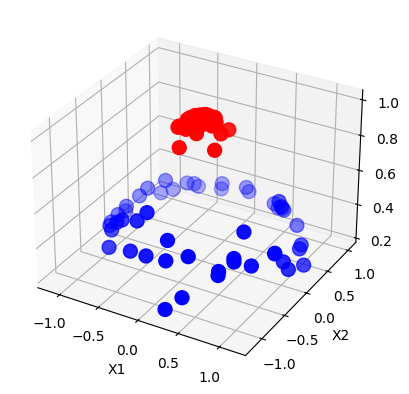

In [10]:
plot_3d_plot(X,y)

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-7-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


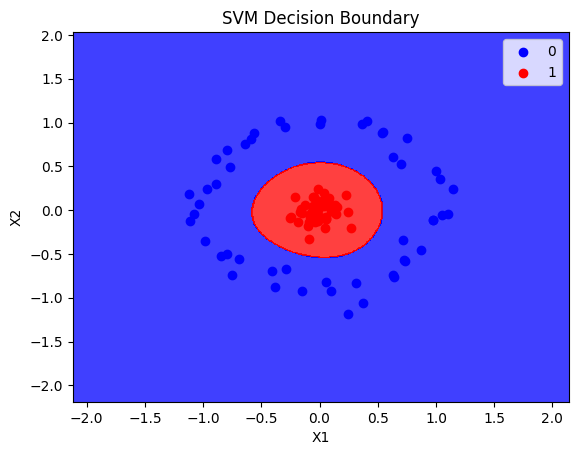

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

In [14]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

1.0

<ipython-input-7-50c9684d90d2>:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


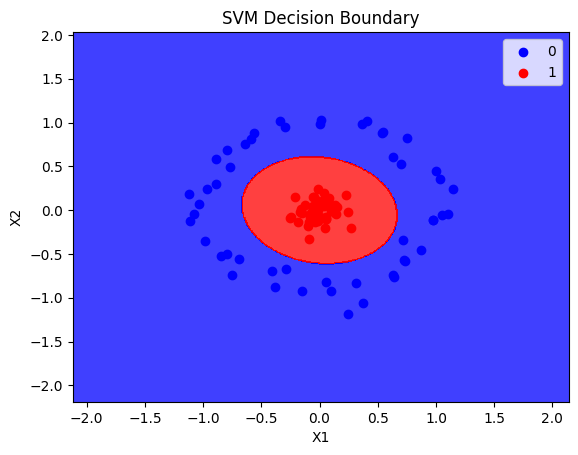

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[ 0.24125973, -1.18721298],
       [-0.17177043, -0.02345482],
       [ 0.24417303, -0.02248129],
       [ 0.31677139, -0.8319247 ],
       [ 0.0524176 , -0.09813153],
       [-0.12852907,  0.06321282],
       [ 0.72145179, -0.5638352 ],
       [ 0.73200293, -0.57979141],
       [ 0.10454418,  0.01167218],
       [-0.98500415, -0.35054555],
       [ 1.1468894 ,  0.23848372],
       [ 0.37356028, -1.0579382 ],
       [ 0.62924251,  0.60770734],
       [-0.08063805, -0.08362871],
       [ 1.00208692,  0.4491995 ],
       [-0.28789835, -0.67743294],
       [ 0.01985314,  0.10175919],
       [-0.74837348, -0.73510516],
       [ 0.15033727,  0.03304702],
       [ 0.03572891,  0.04745091],
       [ 0.00415232,  0.98627313],
       [ 0.87167151, -0.44928515],
       [ 0.04702749, -0.20287917],
       [-0.79316679,  0.69118442],
       [ 0.01285601,  1.03439666],
       [-0.79241114, -0.50060887],
       [ 1.10581407, -0.04480606],
       [ 0.05594129, -0.82329932],
       [ 0.09594783,

In [18]:
np.exp(-(X**2)).sum(1)

array([1.18772691, 1.97037597, 1.94161675, 1.40505062, 1.98767259,
       1.97962809, 1.32189589, 1.29969454, 1.98899379, 1.2633625 ,
       1.21309159, 1.19628197, 1.36425529, 1.98654924, 1.18362013,
       1.55242528, 1.98930443, 1.15370024, 1.97656069, 1.9964752 ,
       1.37803054, 1.28496638, 1.95746647, 1.15325009, 1.34285133,
       1.31202964, 1.29239182, 1.50459719, 1.99081896, 1.9938322 ,
       1.33003727, 1.93483434, 1.46548943, 1.99649656, 1.33585328,
       1.99475068, 1.18724384, 1.31273   , 1.99634924, 1.99146665,
       1.16371242, 1.99670939, 1.35612817, 1.98567236, 1.93115591,
       1.24596265, 1.22206137, 1.3409475 , 1.94302284, 1.97481117,
       1.37476583, 1.22576918, 1.97586102, 1.22853274, 1.32062564,
       1.93479821, 1.36764059, 1.99538174, 1.25089266, 1.8898766 ,
       1.1960964 , 1.98371461, 1.24806806, 1.91949862, 1.27342991,
       1.97500078, 1.95884126, 1.89058655, 1.98127499, 1.97314129,
       1.24999066, 1.21566277, 1.41562557, 1.97864536, 1.99186

In [19]:
X_new=np.exp(-(X**2))

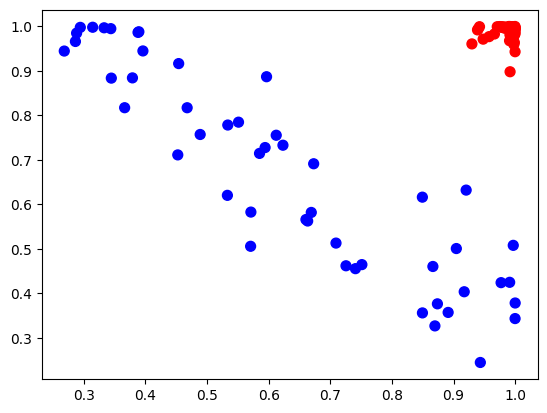

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')